In [1]:
from my_packages import *
from appgeopy import *

In [2]:
gdf = gpd.read_file(r"D:\003_PRESENTATIONS\20_TSX_Sentinel_Report\geofiles\GPS_tsx_angle.shp")
gdf.head(3)

,STATION,LONG,LAT,X_TWD97,Y_TWD97,AZIMUTH,Incidence,geometry
0,DNAN,120.448000,23.673800,193697.389652,2.619007e+06,-100.965012,20.436541,POINT (193697.390 2619007.076)
1,GFES,120.402500,23.741400,189087.785199,2.626512e+06,-100.938744,21.076923,POINT (189087.785 2626512.270)
2,GS68,120.487377,23.606365,197687.026900,2.611524e+06,-100.988556,19.858200,POINT (197687.027 2611524.003)


In [3]:
stations = gdf['STATION'].tolist()
stations[:3]

['DNAN', 'GFES', 'GS68']

In [4]:
available_fpath = []

for station in stations:
    fpath = r"E:\SUBSIDENCE_PROJECT_DATA\GPS_2024_HsuYaru\2__Processed\A__Fulltime\{}.csv".format(station)
    if os.path.isfile(fpath):
        available_fpath.append(fpath)

In [5]:
available_fpath[:3], len(available_fpath)

(['E:\\SUBSIDENCE_PROJECT_DATA\\GPS_2024_HsuYaru\\2__Processed\\A__Fulltime\\DNAN.csv',
  'E:\\SUBSIDENCE_PROJECT_DATA\\GPS_2024_HsuYaru\\2__Processed\\A__Fulltime\\GFES.csv',
  'E:\\SUBSIDENCE_PROJECT_DATA\\GPS_2024_HsuYaru\\2__Processed\\A__Fulltime\\GS68.csv'],
 8)

In [6]:
# fpath = r"E:\SUBSIDENCE_PROJECT_DATA\GPS_2024_HsuYaru\2__Processed\B__GPS_Oct2022__2024\TKJS.xlsx"
# fpath = r"E:\SUBSIDENCE_PROJECT_DATA\GPS_2024_HsuYaru\2__Processed\A__Fulltime\DNAN.csv"
for fpath in available_fpath:
    df = pd.read_csv(fpath, parse_dates=[0], index_col=[0])
    df = df["2023-3":]
    station = os.path.basename(fpath).split(".")[0]
    azim = gdf.query('STATION==@station')['AZIMUTH'].iloc[0]
    inc = gdf.query('STATION==@station')['Incidence'].iloc[0]

    slope_cache = {}
    for col in df.columns:
        trend_series, slope_daily = analysis.get_linear_trend(df[col])
        slope_cache[col] = slope_daily*365.25

    dN, dE, dU = list(slope_cache.values())
    LOS_velocity = ts_disp.get_LOS_disp(dN, dE, dU, incidence_angle=inc, heading_angle=azim)

    print(station, "\t",f"{LOS_velocity*1000:.2f} mm/yr", "\t",f"{LOS_velocity:.6f} m/yr")

DNAN 	 -19.70 mm/yr 	 -0.019703 m/yr
GFES 	 -69.25 mm/yr 	 -0.069249 m/yr
GS68 	 -60.53 mm/yr 	 -0.060527 m/yr
HUWE 	 2.43 mm/yr 	 0.002427 m/yr
KTES 	 -102.90 mm/yr 	 -0.102905 m/yr
PKGM 	 24.15 mm/yr 	 0.024147 m/yr
S103 	 0.41 mm/yr 	 0.000407 m/yr
TKJS 	 -93.56 mm/yr 	 -0.093561 m/yr


In [7]:
for fpath in available_fpath:
    df = pd.read_csv(fpath, parse_dates=[0], index_col=[0])
    # df = df["2023-3":]
    station = os.path.basename(fpath).split(".")[0]
    azim = gdf.query('STATION==@station')['AZIMUTH'].iloc[0]
    inc = gdf.query('STATION==@station')['Incidence'].iloc[0]

    slope_cache = {}
    for col in df.columns:
        trend_series, slope_daily = analysis.get_linear_trend(df[col])
        slope_cache[col] = slope_daily*365.25

    dN, dE, dU = list(slope_cache.values())
    LOS_velocity = ts_disp.get_LOS_disp(dN, dE, dU, incidence_angle=inc, heading_angle=azim)

    print(station, "\t",f"{LOS_velocity*1000:.2f} mm/yr", "\t",f"{LOS_velocity:.6f} m/yr")

DNAN 	 -6.87 mm/yr 	 -0.006873 m/yr
GFES 	 -21.92 mm/yr 	 -0.021916 m/yr
GS68 	 4.22 mm/yr 	 0.004215 m/yr
HUWE 	 -14.32 mm/yr 	 -0.014320 m/yr
KTES 	 -33.58 mm/yr 	 -0.033579 m/yr
PKGM 	 -13.68 mm/yr 	 -0.013684 m/yr
S103 	 5.11 mm/yr 	 0.005111 m/yr
TKJS 	 -35.16 mm/yr 	 -0.035160 m/yr


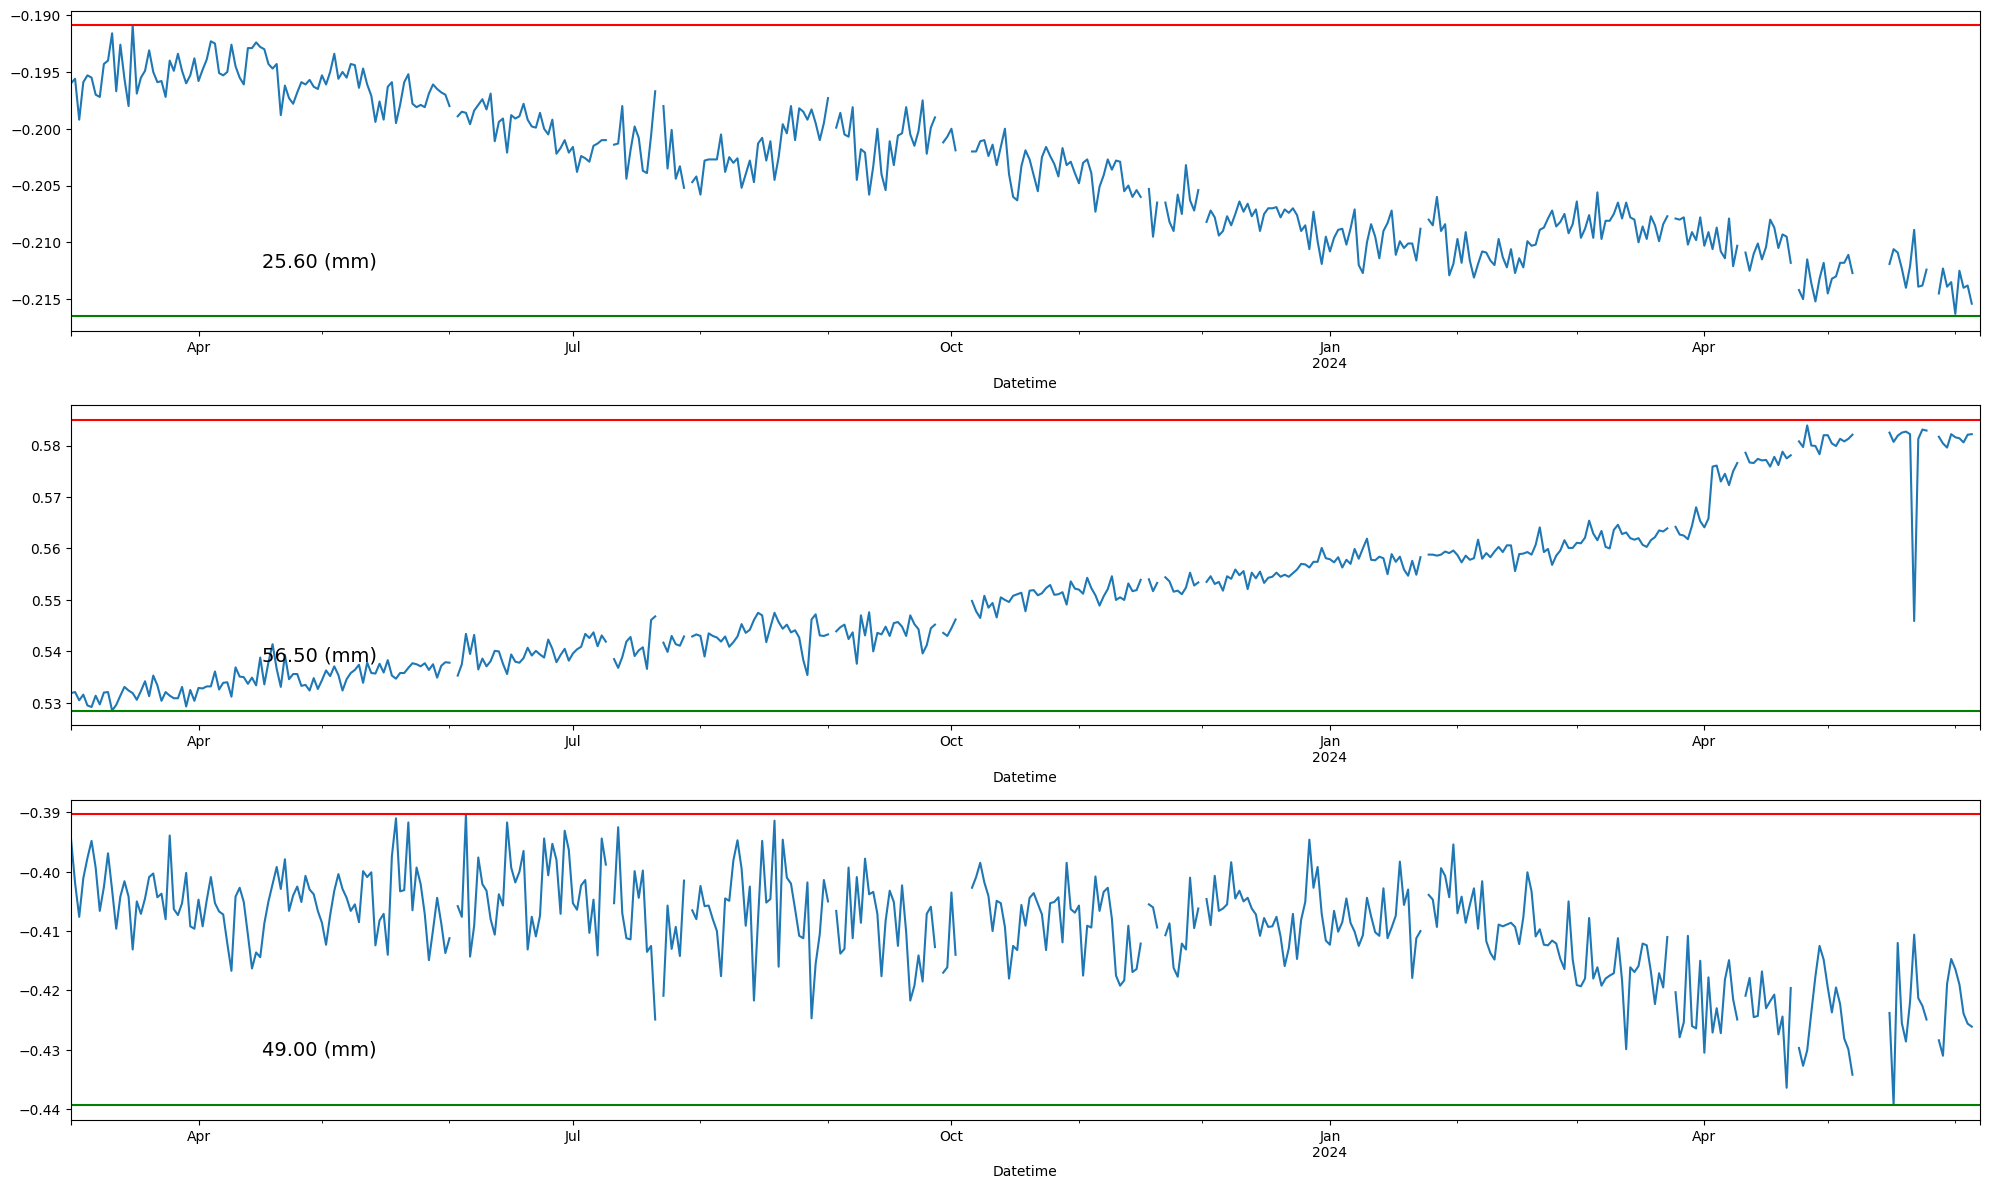

In [8]:
fpath = r"E:\SUBSIDENCE_PROJECT_DATA\GPS_2024_HsuYaru\2__Processed\A__Fulltime\HUWE.csv"
df = pd.read_csv(fpath, parse_dates=[0], index_col=[0])
df = df["2023-3":]

fig = plt.figure(figsize=(20, 12))
for idx, col in enumerate(df.columns):
    ax = fig.add_subplot(3, 1, idx+1)
    df[col].plot(ax=ax)
    vmin, vmax = df[col].min(), df[col].max()
    amp = vmax - vmin
    ax.text(x=0.1, y=0.2, s=f"{amp*1000:.2f} (mm)", transform=ax.transAxes, fontsize=14)
    ax.axhline(y=vmax, color='red')
    ax.axhline(y=vmin, color='green')
fig.tight_layout()
fig.show()